In [ ]:
# Requires numpy, matplotlib and pymatgen

import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from simulate import simulate_spectrum, pseudo_voigt


In [2]:
def collate_fitted_peak_parameters(peaks):
    """ Make a dictionary of peak parameters """

    parameters = ["ampl", "centre", "width"]
    return dict(zip(parameters, peaks))

def get_peak_info(pattern):
    """ Extract peak information from the pattern """
    
    peaks = list(zip(pattern.y, pattern.x, (0.02 for _ in pattern.x)))
    fitted_peaks = [collate_fitted_peak_parameters(peak) for peak in peaks]
    return fitted_peaks
    
def plot_simulated_pattern(sim_x, sim_y):
    """ Plot the simulated XRD pattern """
    
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(sim_x, sim_y, color='blue', label='Simulated pattern')
    plt.xlabel("2θ /degrees")
    plt.ylabel("Intensity / a.u.")
    plt.legend()
    plt.show()


In [3]:
# Load structure from CIF file
cif_file = "data/SrTiO3_CollCode23076.cif"  # replace with your CIF file path
structure = Structure.from_file(cif_file)

# Create XRD calculator (default wavelength: Cu Kα ≈ 1.5406 Å)
xrd_calculator = XRDCalculator(wavelength="CuKa")

# Get diffraction pattern
pattern = xrd_calculator.get_pattern(structure)



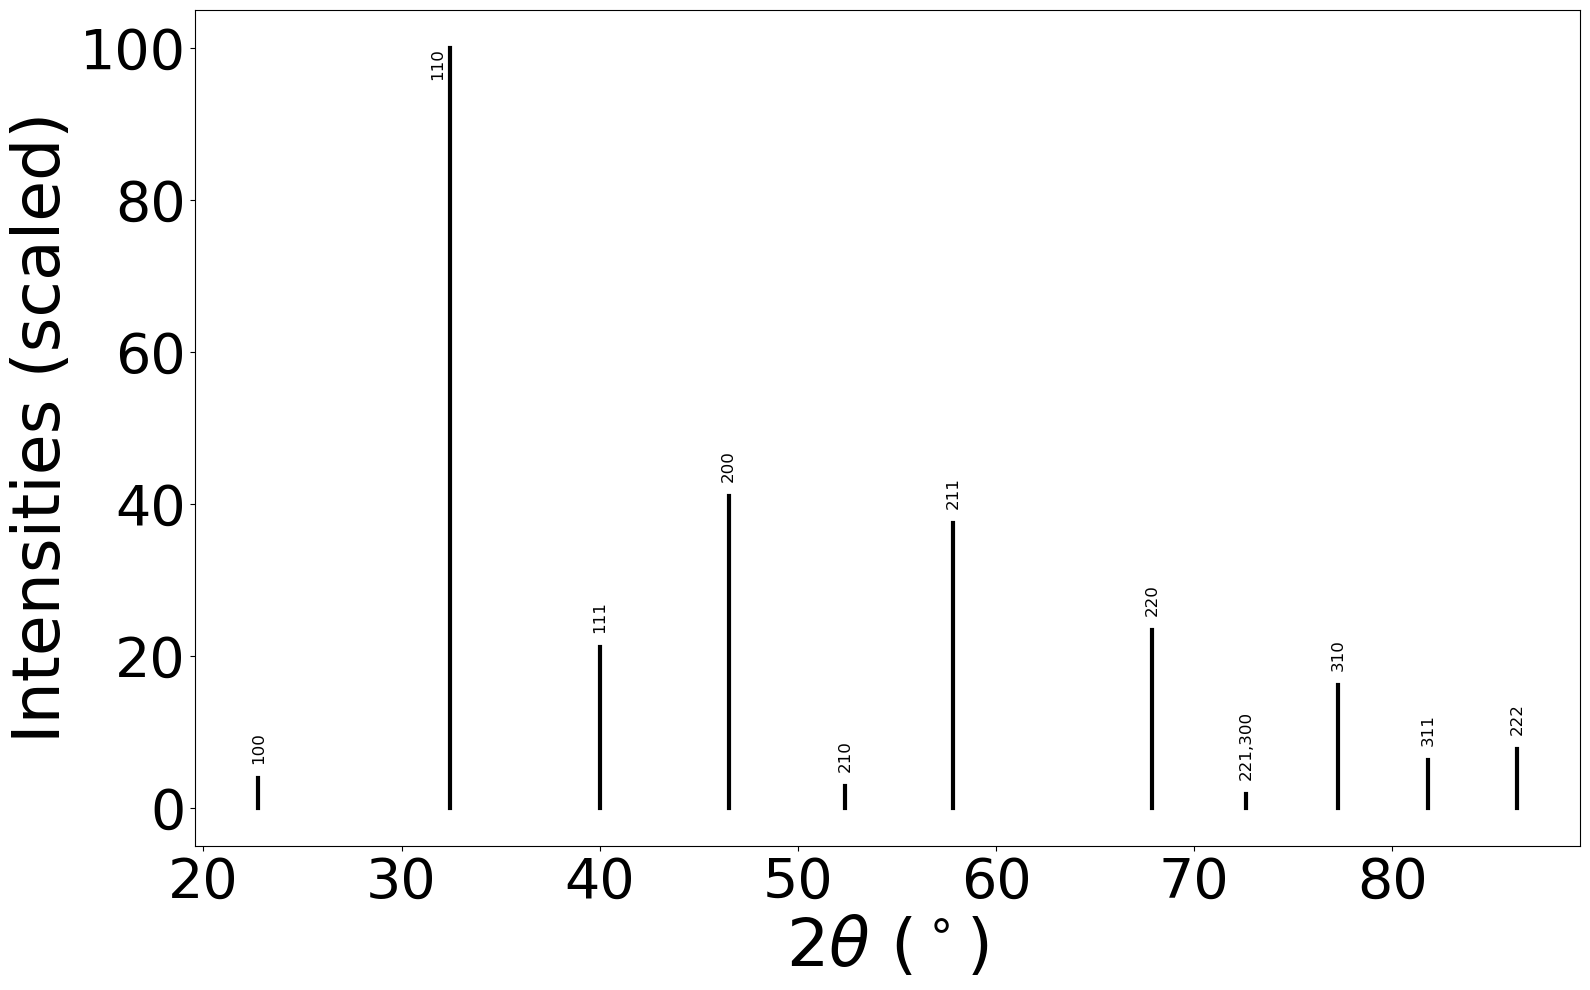

In [4]:
# Plot the XRD pattern 
xrd_calculator.get_plot(structure, fontsize=12)
plt.show()

In [5]:
predicted_peaks = get_peak_info(pattern)
sim_x = np.linspace(10, 80, 7000)  # Simulated x-axis range

_, sim_y = simulate_spectrum(pseudo_voigt, sim_x, predicted_peaks, add_noise=False)

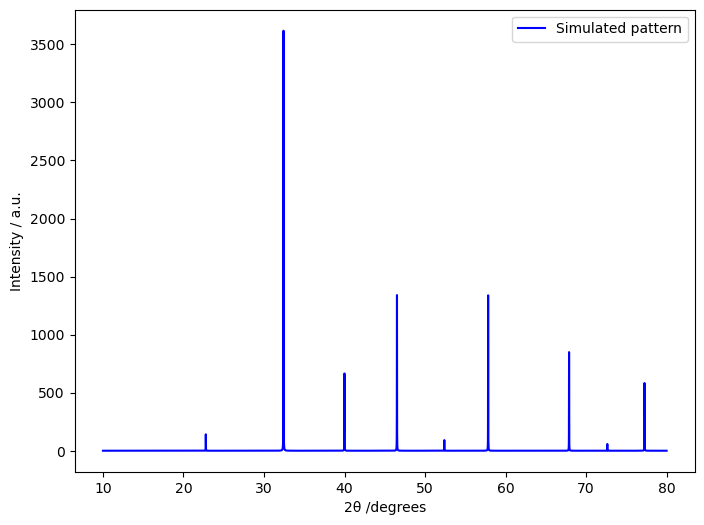

In [6]:
plot_simulated_pattern(sim_x, sim_y)